In [25]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

In [26]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [27]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
#     rfc = RandomForestClassifier()
    from sklearn.naive_bayes import GaussianNB
    rfc = GaussianNB()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [28]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Synthetic"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(real_data, fake_data, name):
    n_bins=100
    colors = ["Real text\n"+'$\mu={}$'.format(
        round(np.nanmean(real_data), 3)), "Synthetic text\n"+ '$\mu={}$'.format(
        round(np.nanmean(fake_data), 3))]
    data = combine_real_fake(real_data, fake_data)
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper left")
    plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

                                                text   novelty  diversity  \
0  What this group does is to take down various d...  0.778295   0.762312   
1  Over 1 , 600 a day have reached Greece this mo...  0.701830   0.734261   
2  We ' re working through a legacy period , with...  0.660598   0.672135   
3  The first time anyone says you need help , I '...  0.472279   0.510684   
4  Out of those who came last year , 69 per cent ...  0.389177   0.365187   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  
10500


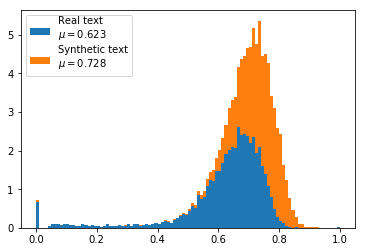

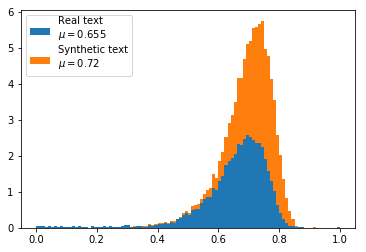

In [93]:
METRIC = "wmd"
import numpy as np

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text_copy.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

combined_data = real_data.append(fake_data)
print(combined_data.head())

y = combined_data['label'].values

print(len(real_data))


csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
_stacked_hist(real_data['novelty'], fake_data['novelty'], "")
# stacked_hist(csvjac_novs, "" )#, "Novelties of real and synthetic text")

csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
_stacked_hist(real_data['diversity'], fake_data['diversity'], "")


# fake_data.boxplot(column=['diversity', 'novelty'])
# real_data.boxplot(column=['diversity', 'novelty'])


# boxplot = combined_data.boxplot(column=['diversity', 'novelty'], by=['X', 'Y'])


# fig, axes = plt.subplots()

# axes.violinplot(dataset = [combined_data[combined_data.label == 0]["novelty"].values,
#                            combined_data[combined_data.label == 1]["novelty"].values])
                          

# dataset = [combined_data[combined_data.label == 0]["novelty"].values,
#                            combined_data[combined_data.label == 1]["novelty"].values]
# axes.set_title('D')
# axes.yaxis.grid(True)
# axes.set_xlabel('Text type')
# axes.set_ylabel('Novelty/Diversity')

# plt.show()

# import seaborn as sns

# df = pd.melt(combined_data, value_vars=['Real', 'Fake'], id_vars='label')
# sns.violinplot(x='novelty', y='label', hue='label',data=combined_data)
# plt.show()

# stacked_hist(csvjac_divs, "") # , "Diversities of real and fake text")

In [85]:
# fig, axes = plt.subplots(1, 2, figsize=(5, 5), sharey='row')
# # axes_cols = (axes.flatten()[:2], axes.flatten()[1:2])

# dataset = [combined_data[combined_data.label == 0]["novelty"].values,
#                            combined_data[combined_data.label == 1]["novelty"].values]

# import seaborn as sns

# for data, axes in zip(dataset, axes):
#         sns.violinplot(x="day", y="total_bill", hue="smoker",
#             data=data, split=True)
#         ax.set_title('scale = {}'.format(scale), y=0.95)
# fig.tight_layout()

# combined_data.head(10)

# # df = combined_data.melt(var_name='novelty', value_name='label')
# df.head()

# ax = sns.violinplot(combined_data[combined_data.label == 0]["novelty"])

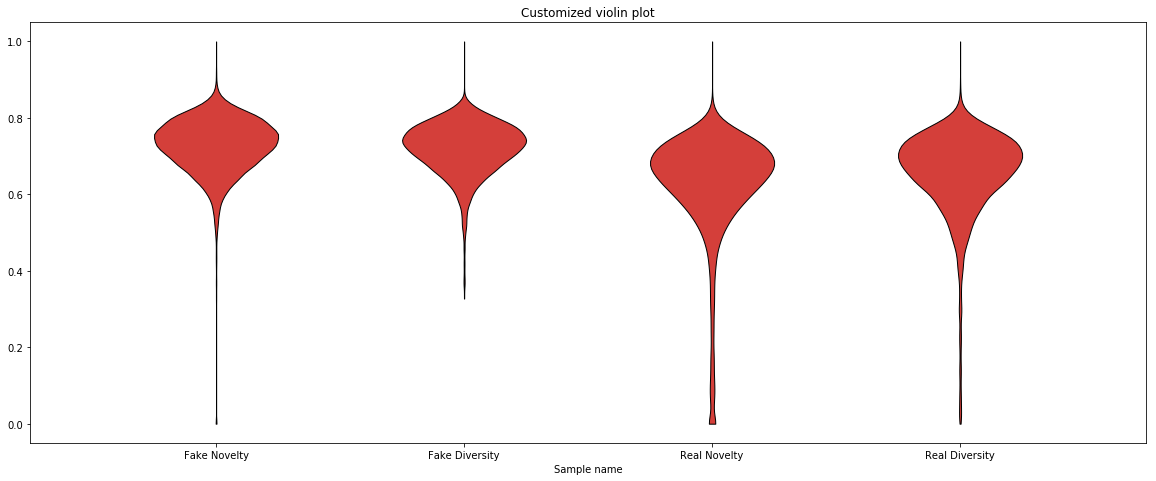

In [75]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [combined_data[combined_data.label == 0]["novelty"].values,
                           combined_data[combined_data.label == 0]["diversity"].values,
                           combined_data[combined_data.label == 1]["novelty"].values,
                           combined_data[combined_data.label == 1]["diversity"].values]

fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), sharey=True)

# ax1.set_title('Default violin plot')
# ax1.set_ylabel('Observed values')
# ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
# whiskers = np.array([
#     adjacent_values(sorted_array, q1, q3)
#     for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
# whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

# inds = np.arange(1, len(medians) + 1)
# ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
# ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['Fake Novelty', 'Fake Diversity', 'Real Novelty', 'Real Diversity']
for ax in [ ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

## Classify using both novelty and diversity

input dimensions: 20914 | output dimensions: 20914
x_train dimensions: 18822 | y_train dimensions: 18822
x_test dimensions: 2092 | y_test dimensions: 2092
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      1065
           1       0.79      0.45      0.57      1027

   micro avg       0.67      0.67      0.67      2092
   macro avg       0.71      0.67      0.65      2092
weighted avg       0.71      0.67      0.65      2092

0.6711281070745698
[[944 121]
 [567 460]]


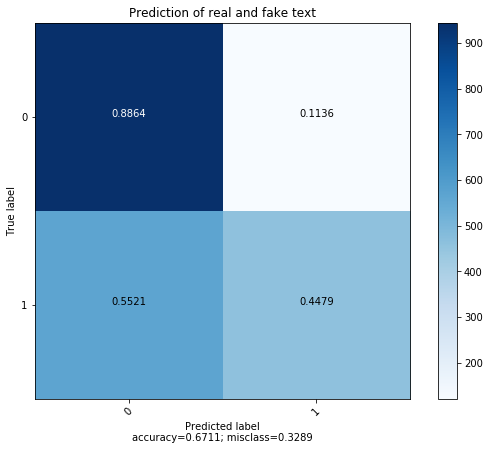

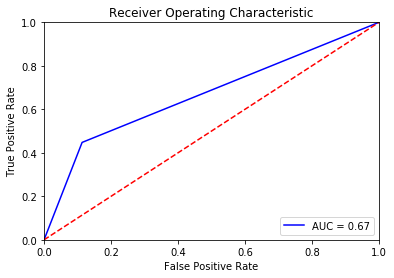

In [76]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

test_labels, y_preds = classify(novs_divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [77]:
# https://stackoverflow.com/questions/42562146/classification-report-with-nested-cross-validation-in-sklearn

from sklearn import model_selection

# def crwac(y_true, y_pred):
#     print(classification_report(y_true, y_pred))
    
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score

def classification_report_with_accuracy_score(y_true, y_pred):

#     print (classification_report(y_true, y_pred)) # print classification report
    return f1_score(y_true, y_pred) # return accuracy score

seed=7
kfold = model_selection.KFold(n_splits=20, random_state=seed, shuffle=True)
scoring='accuracy'
cv_results = model_selection.cross_val_score(RandomForestClassifier(), novs_divs_x, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
print(cv_results.mean())

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/

0.6427890996070438


## Classify using only novelty

input dimensions: 20914 | output dimensions: 20914
x_train dimensions: 18822 | y_train dimensions: 18822
x_test dimensions: 2092 | y_test dimensions: 2092
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      1057
           1       0.79      0.43      0.56      1035

   micro avg       0.66      0.66      0.66      2092
   macro avg       0.70      0.66      0.64      2092
weighted avg       0.70      0.66      0.64      2092

0.6630019120458891
[[937 120]
 [585 450]]


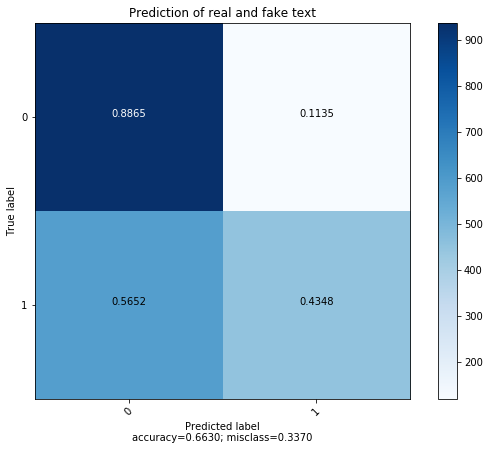

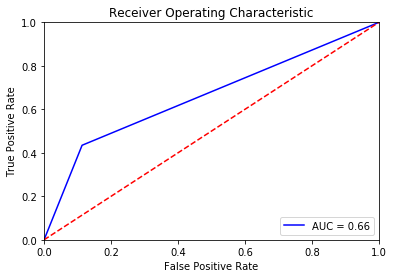

In [78]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

test_labels, y_preds = classify(novs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [79]:
from sklearn import model_selection

def crwac(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
scoring='accuracy'
cv_results = model_selection.cross_val_score(RandomForestClassifier(), novs_x, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
print(cv_results.mean())

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1070
           1       0.62      0.62      0.62      1022

   micro avg       0.63      0.63      0.63      2092
   macro avg       0.63      0.63      0.63      2092
weighted avg       0.63      0.63      0.63      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1092
           1       0.62      0.64      0.63      1000

   micro avg       0.64      0.64      0.64      2092
   macro avg       0.64      0.64      0.64      2092
weighted avg       0.64      0.64      0.64      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1040
           1       0.65      0.62      0.64      1052

   micro avg       0.64      0.64      0.64      2092
   macro avg       0.64      0.64      0.64      2092
weighted avg       0.64      0.64      0.64      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1083
           1       0.62      0.60      0.61      1009

   micro avg       0.63      0.63      0.63      2092
   macro avg       0.63      0.63      0.63      2092
weighted avg       0.63      0.63      0.63      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1058
           1       0.62      0.59      0.61      1033

   micro avg       0.62      0.62      0.62      2091
   macro avg       0.62      0.62      0.62      2091
weighted avg       0.62      0.62      0.62      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1015
           1       0.64      0.61      0.62      1076

   micro avg       0.62      0.62      0.62      2091
   macro avg       0.62      0.62      0.62      2091
weighted avg       0.62      0.62      0.62      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1030
           1       0.64      0.61      0.63      1061

   micro avg       0.63      0.63      0.63      2091
   macro avg       0.63      0.63      0.63      2091
weighted avg       0.63      0.63      0.63      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1001
           1       0.67      0.61      0.64      1090

   micro avg       0.64      0.64      0.64      2091
   macro avg       0.64      0.64      0.64      2091
weighted avg       0.64      0.64      0.64      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1060
           1       0.63      0.60      0.62      1031

   micro avg       0.63      0.63      0.63      2091
   macro avg       0.63      0.63      0.63      2091
weighted avg       0.63      0.63      0.63      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1051
           1       0.62      0.61      0.62      1040

   micro avg       0.62      0.62      0.62      2091
   macro avg       0.62      0.62      0.62      2091
weighted avg       0.62      0.62      0.62      2091

0.6304857931607096


## Classify using only diversity

input dimensions: 20914 | output dimensions: 20914
x_train dimensions: 18822 | y_train dimensions: 18822
x_test dimensions: 2092 | y_test dimensions: 2092
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      1014
           1       0.77      0.37      0.50      1078

   micro avg       0.62      0.62      0.62      2092
   macro avg       0.67      0.62      0.59      2092
weighted avg       0.67      0.62      0.59      2092

0.6171128107074569
[[893 121]
 [680 398]]


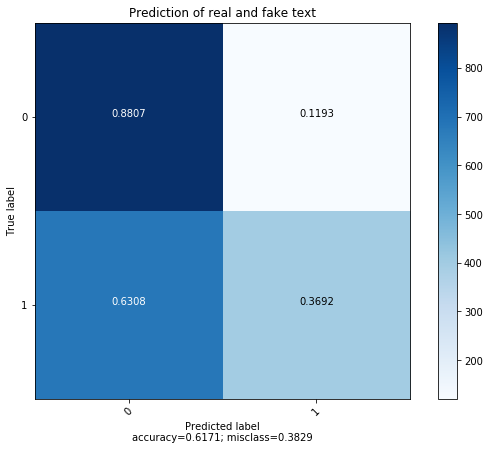

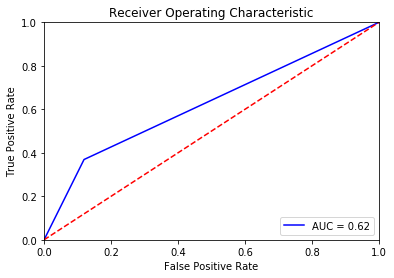

In [80]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [81]:
from sklearn import model_selection

def crwac(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
scoring='accuracy'
cv_results = model_selection.cross_val_score(RandomForestClassifier(), divs_x, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
print(cv_results.mean())

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1070
           1       0.66      0.61      0.64      1022

   micro avg       0.66      0.66      0.66      2092
   macro avg       0.66      0.66      0.66      2092
weighted avg       0.66      0.66      0.66      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1092
           1       0.65      0.64      0.64      1000

   micro avg       0.66      0.66      0.66      2092
   macro avg       0.66      0.66      0.66      2092
weighted avg       0.66      0.66      0.66      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.68      0.66      1040
           1       0.66      0.61      0.63      1052

   micro avg       0.65      0.65      0.65      2092
   macro avg       0.65      0.65      0.65      2092
weighted avg       0.65      0.65      0.65      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1083
           1       0.65      0.63      0.64      1009

   micro avg       0.66      0.66      0.66      2092
   macro avg       0.66      0.66      0.66      2092
weighted avg       0.66      0.66      0.66      2092



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1058
           1       0.65      0.63      0.64      1033

   micro avg       0.65      0.65      0.65      2091
   macro avg       0.65      0.65      0.65      2091
weighted avg       0.65      0.65      0.65      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1015
           1       0.67      0.61      0.64      1076

   micro avg       0.64      0.64      0.64      2091
   macro avg       0.64      0.64      0.64      2091
weighted avg       0.64      0.64      0.64      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.68      0.66      1030
           1       0.67      0.62      0.64      1061

   micro avg       0.65      0.65      0.65      2091
   macro avg       0.65      0.65      0.65      2091
weighted avg       0.65      0.65      0.65      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1001
           1       0.67      0.60      0.63      1090

   micro avg       0.64      0.64      0.64      2091
   macro avg       0.64      0.64      0.64      2091
weighted avg       0.64      0.64      0.63      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1060
           1       0.64      0.63      0.64      1031

   micro avg       0.65      0.65      0.65      2091
   macro avg       0.65      0.64      0.64      2091
weighted avg       0.65      0.65      0.65      2091



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.69      0.66      1051
           1       0.66      0.60      0.63      1040

   micro avg       0.65      0.65      0.65      2091
   macro avg       0.65      0.65      0.65      2091
weighted avg       0.65      0.65      0.65      2091

0.6494680150659341


## Classify with both novelty and diversity: test with unseen data (TBD)

In [82]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])
    
# # unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# # unlabelled_fake='unlabelled_fake_text.csv' # same here

# # _real_data = pd.read_csv(unlabelled_real)
# # _fake_data = pd.read_csv(unlabelled_real)

# # _combined_data = _real_data.append(_fake_data)

# # x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

# x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

# print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
# print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
# print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# # Initialize classifier
# rfc = RandomForestClassifier()

# # Train classifier
# model = rfc.fit(x_train, train_labels)

# # Make predictions
# preds = rfc.predict(test)

# # Evaluate model
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(test_labels, preds))
# print(accuracy_score(test_labels, preds))

[[0.4355358907786219], [0.6198857249048736], [0.7710021558604363], [0.717785817018294], [0.6671710969864235], [0.768688112], [0.6045624015157], [0.692919101], [0.7316631109999999], [0.657900913]] [1 1 1 1 1 0 1 0 0 0]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.  1.  0.  ... 0.7 1.  0. ]
[[0.6969479759999999], [0.7298594193825358], [0.6272924561468896], [0.7414520590000001], [0.788356453], [0.5964843239493199], [0.741535112], [0.6789876979999999], [0.662397272], [0.6922116190000001]] [0 1 1 0 0 1 0 0 0 0]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.  0.  0.  ... 0.2 1.  0.3]
[[0.816867496, 0.778332129], [0.773744201, 0.68109096], [0.5935929796567603, 0.5856174600067221], [0.5623542512444567, 0.4793927299269034], [0.560791417, 0.63016368], [0.812174615, 0.740566473], [0.5678393815645808, 0.6512755285080987], [0.4673117348453037, 0.4898312384081352], [0.6599126552112362, 0.6453721031282914], [0.6867043739416834, 0.7297873260744665]] [0 0 1 1 0 0 1 1 1 1]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.7 0.7 0.2 ... 1.  0.9 0. ]


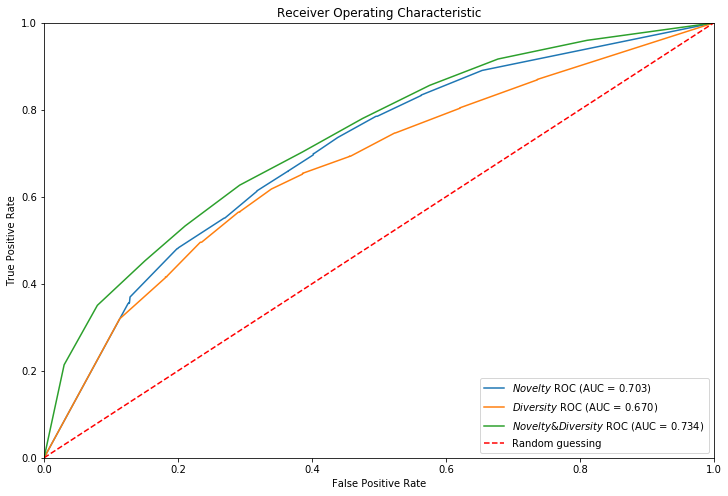

In [83]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = GaussianNB()

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': model,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': model,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': model,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


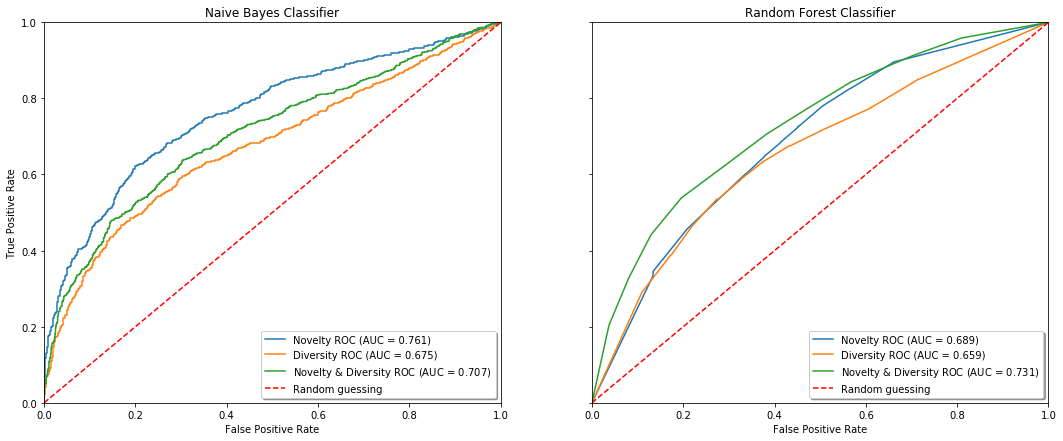

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': model,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': model,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': model,
    'metric': novs_divs_x
},
]


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


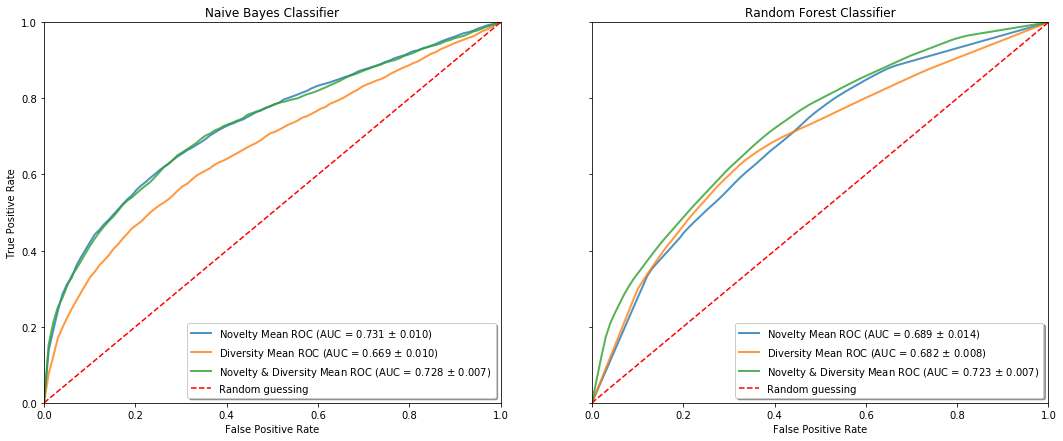

In [41]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

seed=7

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6, random_state=seed)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')
    
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
#     roc_auc = auc(fpr, tpr)
#     ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


mean acc: 0.669622882710131 +- 0.008119639926720141
mean acc: 0.6258389261744967 +- 0.008178977515425064
mean acc: 0.660594439117929 +- 0.008609010864742203


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6328699264940876 +- 0.004798424552089875


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6461329498242251 +- 0.01239649690245626


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6522051773729626 +- 0.007806955094591666


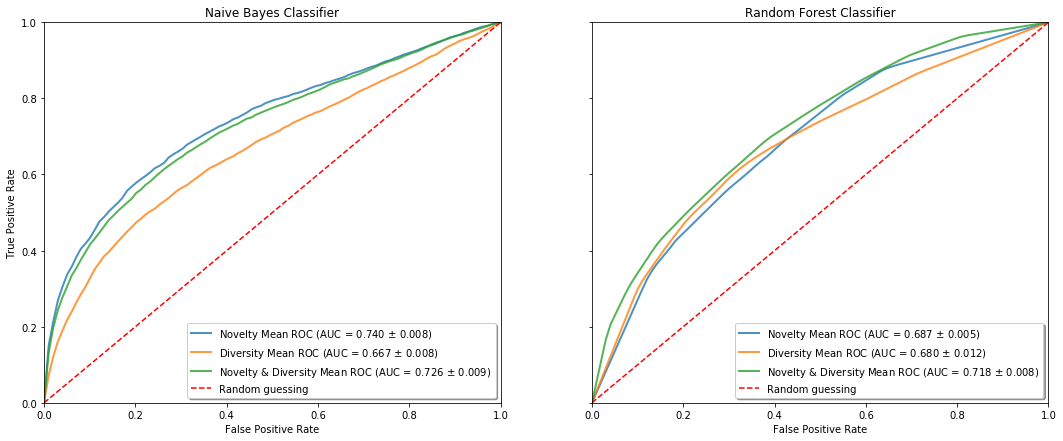

In [42]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

seed=7

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6, random_state=seed)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
        
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')
    
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
#     roc_auc = auc(fpr, tpr)
#     ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)


    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


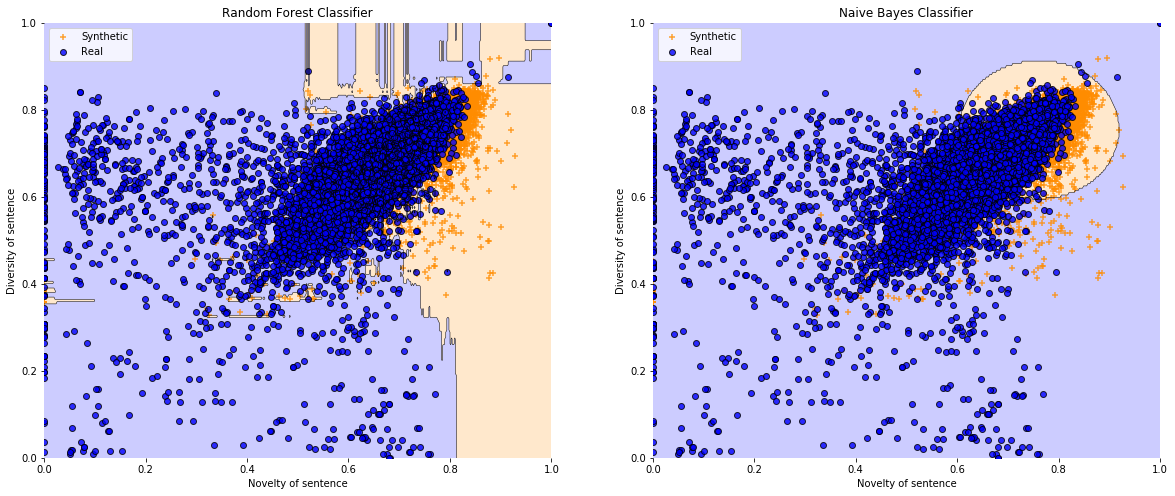

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = GaussianNB()

# Loading some example data
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
          'Random Forest Classifier',
          'Naive Bayes Classifier'
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='+o', colors='darkorange,blue', contourf_kwargs = {'alpha': 0.2})
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('Novelty of sentence')
    plt.ylabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=0.5)

plt.show()

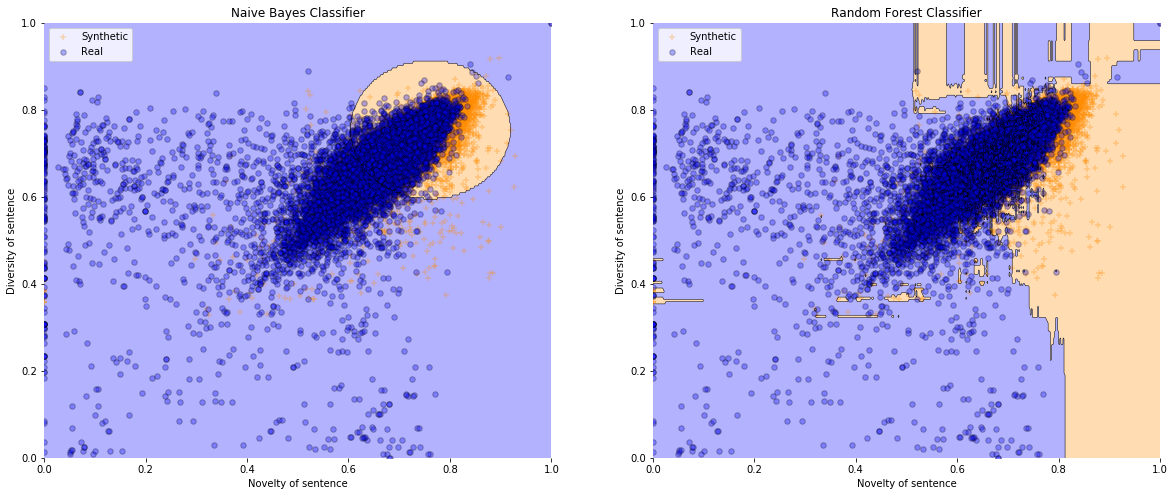

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf3 = RandomForestClassifier(random_state=0, n_estimators=100)
clf2 = GaussianNB()

# Loading some example data
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
            'Naive Bayes Classifier',
          'Random Forest Classifier',
          
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    
    scatter_kwargs = {'s': 30, 'edgecolor': 'black', 'alpha': 0.3}
    contourf_kwargs = {'alpha': 0.3}
    scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.1}
    
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='+o', colors='darkorange,blue',scatter_kwargs=scatter_kwargs,
                                  contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('Novelty of sentence')
    plt.ylabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=1)

plt.show()

/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


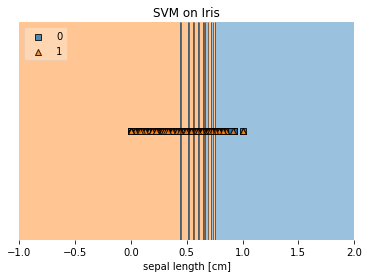

In [45]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
# iris = datasets.load_iris()
X = np.array(novs_x)
y = np.array(combined_data['label'].values)

# Training a classifier
svm = RandomForestClassifier()
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.title('SVM on Iris')

plt.show()

mean acc: 0.6663143421996262 +- 0.016024935434590132
mean acc: 0.6254139675137981 +- 0.012572278329905527
mean acc: 0.6604641727742864 +- 0.014198919018226267


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6298714336434731 +- 0.016027751611830197


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6486695426864229 +- 0.011395982258107349


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.6600811700441482 +- 0.012183753715623458


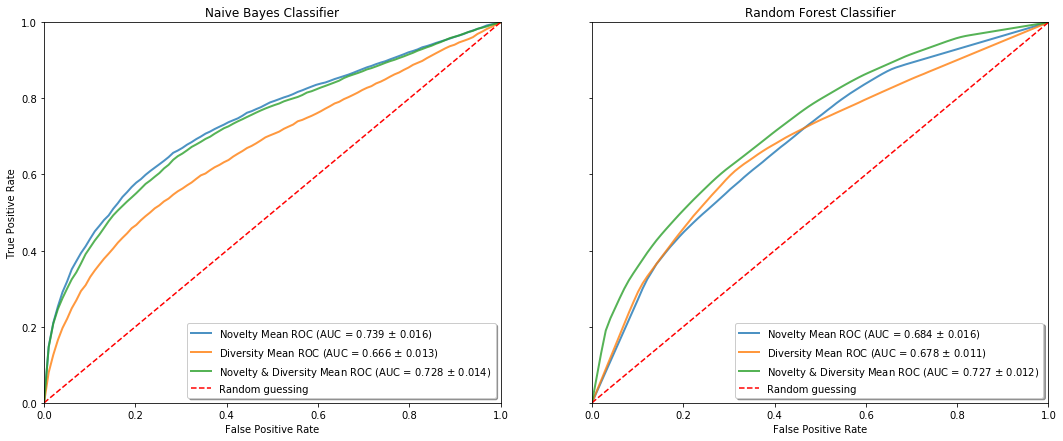

In [46]:
# Stratified 10-fold cross validation

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]


seed=7

cv = StratifiedKFold(n_splits=10, random_state=seed)


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = np.array(m['metric'])
    

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    i=0
    for train, test in (cv.split(x,y)):
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
        
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)

        i += 1

    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = np.array(m['metric'])
    
    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i=0
    for train, test in (cv.split(x,y)):
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)


        i += 1


    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


In [66]:
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

models =[ RandomForestClassifier(n_estimators=10), GaussianNB()]
model_names = ['RF', 'Gaussian']*3

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty_Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

from sklearn.metrics import classification_report, recall_score, make_scorer
    
print(sklearn.metrics.SCORERS.keys())

seed=7

jaccard_f1 = dict()


for m in metrics:
    
    for i, model in enumerate(models):
        x = m['metric']
        kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
        scoring='f1'
        
#         cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
        
        y_pred = cross_val_predict(model, x, y, cv=10)
#         print(cv_results)
        
        print('wmd_' + m['label'] + '_' + model_names[i] + '=', end='')
#         print( ','.join( res for res in str(cv_results).split()))
#         print(cv_results.mean(), cv_results.std())
        print(classification_report(y, y_pred))


dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])
wmd_Novelty_RF=              precision    recall  f1-score   support

           0       0.62      0.65      0.64     10441
           1       0.63      0.61      0.62     10414

   micro avg       0.63      0.63      0.63     20855
   macro avg       0.63      0.63      0.63     20855
weighted avg       0.63      0.63  

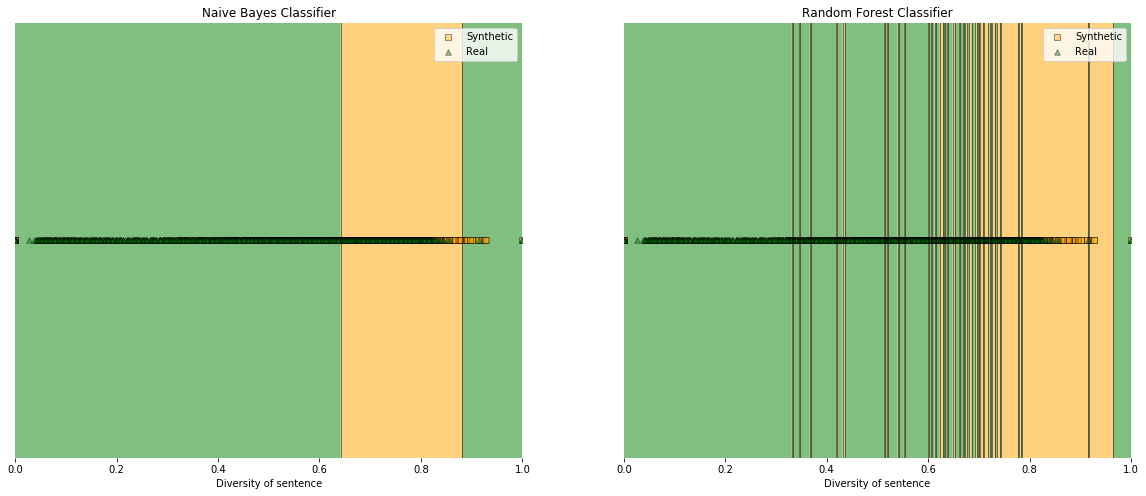

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import ecdf
from seaborn import distplot


# Initializing Classifiers
clf3 = RandomForestClassifier(random_state=0, n_estimators=10)
clf2 = GaussianNB()

# Loading some example data
X = np.array(novs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
            'Naive Bayes Classifier',
          'Random Forest Classifier',
          
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    
    scatter_kwargs = {'s': 30, 'edgecolor': 'black', 'alpha': 0.4}
    contourf_kwargs = {'alpha': 0.5}
    scatter_highlight_kwargs = {'s': 100, 'label': 'Test data', 'alpha': 0.1}
#     ax = distplot(np.array(real_data['novelty'].values), hist=False)
#     ax = distplot(np.array(fake_data['novelty'].values), hist=False)

    
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='s^', colors='orange,green',scatter_kwargs=scatter_kwargs,
                                  contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.xlim(0,1)
    plt.ylim(-0.1,0.1)
#     plt.xlabel('Novelty of sentence')
    plt.xlabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=1)

plt.show()

In [52]:
import sklearn
from sklearn import model_selection
from sklearn import metrics

models =[ RandomForestClassifier(n_estimators=10), GaussianNB()]
model_names = ['RF', 'Gaussian']*3

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty_Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

    
print(sklearn.metrics.SCORERS.keys())

seed=7

jaccard_f1 = dict()


for m in metrics:
    
    for i, model in enumerate(models):
        x = m['metric']
        kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
#         scoring=['f1', 'recall', 'precision']
        
        scoring='precision'
        
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        
        print('wmd_' + m['label'] + '_' + model_names[i] + '=', end='')
#         print( ','.join( res for res in str(cv_results).split()))
        print(cv_results.mean(), cv_results.std())

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])
wmd_Novelty_RF=0.6335804192636993 0.011782212388434693
wmd_Novelty_Gaussian=0.8069481238427679 0.016942387627655327
wmd_Diversity_RF=0.6570170947116124 0.010024705969910301
wmd_Diversity_Gaussian=0.7400532985149642 0.011870895021102624
wmd_Novelty_Diversity_RF=0.6736352200889298 0.015968623492533664
wmd_Novelty_Diversity

In [ ]:
wmd_Novelty_RF=0.6113860509881794 0.02304647159584313
wmd_Novelty_Gaussian=0.4358531494705556 0.017894361748062252
wmd_Diversity_RF=0.6165730021148276 0.011529609613456789
wmd_Diversity_Gaussian=0.38505764610656 0.017981606460689293
wmd_Novelty_Diversity_RF=0.6154164845923656 0.020660115331549773
wmd_Novelty_Diversity_Gaussian=0.4395964127214162 0.01619958758164315